In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [3]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


In [4]:
type(gdp_df)

pandas.core.frame.DataFrame

#### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.shape

(7176, 4)

In [6]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [7]:
type(gdp_df['Country or Area'])

pandas.core.series.Series

In [8]:
type(gdp_df['Year'])

pandas.core.series.Series

In [9]:
type(gdp_df['Value'])

pandas.core.series.Series

In [10]:
type(gdp_df['Value Footnotes'])

pandas.core.series.Series

#### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
gdp_3c = gdp_df.drop(columns = 'Value Footnotes')
gdp_3c.head()

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


In [12]:
type(gdp_3c)

pandas.core.frame.DataFrame

In [13]:
gdp_3c.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_3c.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


#### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [14]:
gdp_3c.Country.value_counts()

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

In [16]:
gdp_3c.Year.value_counts()

2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

Data collected from 1990 to 2020.  Max number of countries = 242, min = 206. 2013 marks the first year 242 countries had data.

#### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [17]:
gdp2020 = gdp_3c.query('Year == 2020')
gdp2020.shape

(240, 3)

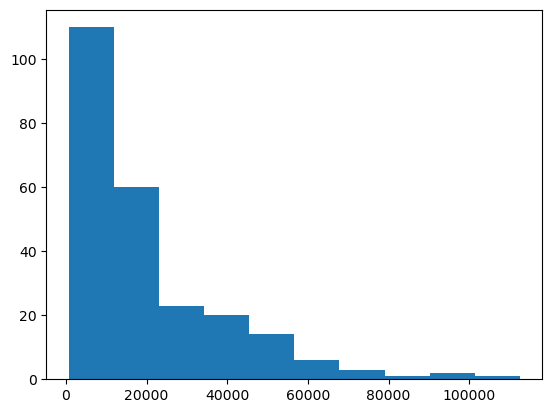

In [18]:
plt.hist(gdp2020.GDP_Per_Capita)
plt.show()

##### Histogram - well suited for this type of analysis.

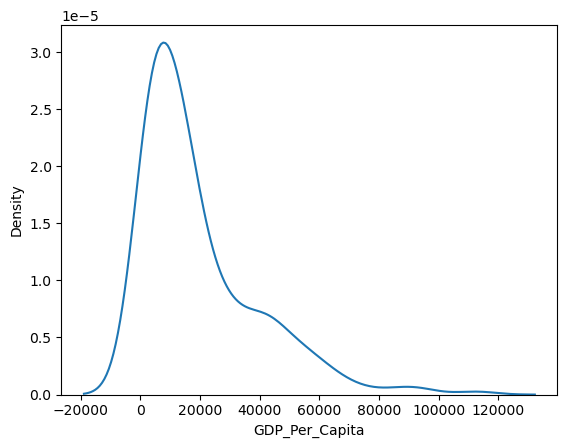

In [19]:
sns.kdeplot(gdp2020['GDP_Per_Capita'])
plt.show()

##### Density plot - the smoothing function may not be accurate. Are there actually countries with negative GDP?

In [22]:
gdp2020["GDP_Per_Capita"].min()

731.064073644609

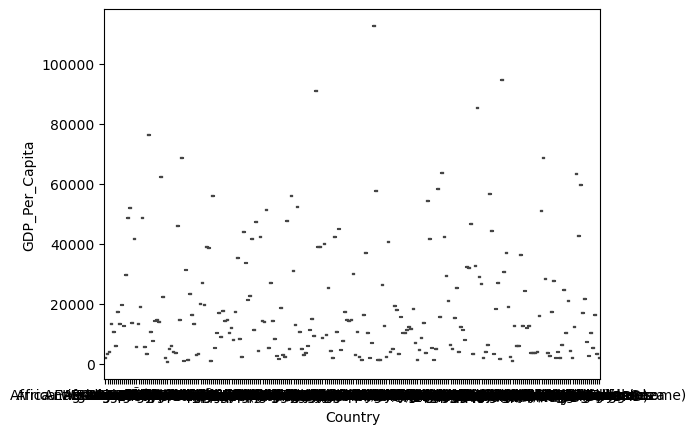

In [20]:
sns.boxplot(x=gdp2020["Country"], y=gdp2020["GDP_Per_Capita"])
plt.show()

##### Box plot - hard to examine the data.  Not well suited for this analysis.

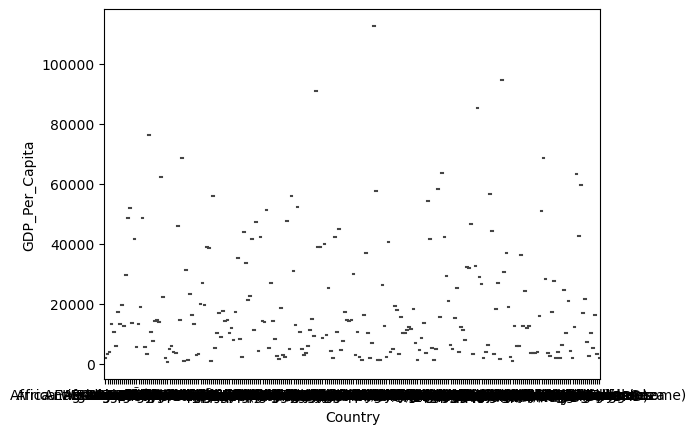

In [23]:
sns.violinplot(x=gdp2020["Country"], y=gdp2020["GDP_Per_Capita"])
plt.show()

Violin plot - also hard to examine the data.  Not well suited for this analysis.

#### 9. What was the median GDP per capita value in 2020?

In [24]:
gdp2020.GDP_Per_Capita.mean()

19496.88171245749

In [25]:
import statistics as stat

In [26]:
stat.mean(gdp2020.GDP_Per_Capita)

19496.881712457485

#### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [27]:
gdp_decades = gdp_3c[(gdp_3c.Year == 1990) | (gdp_3c.Year == 2000) | (gdp_3c.Year == 2010) | (gdp_3c.Year == 2020)]

In [28]:
gdp_decades.head(2)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070


In [29]:
gdp_decades.tail(2)

,Country,Year,GDP_Per_Capita
7165,Zimbabwe,2000,2771.060576
7175,Zimbabwe,1990,2652.129209


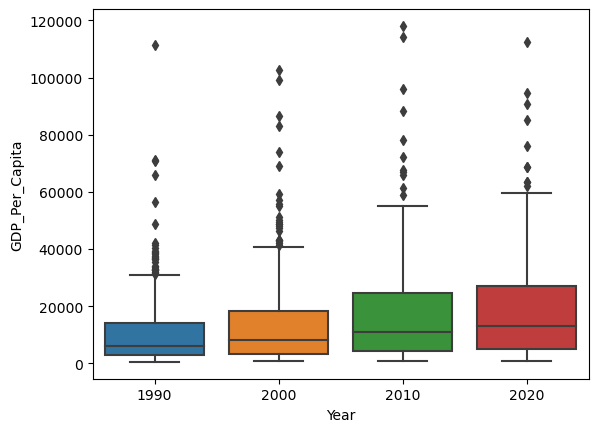

In [30]:
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )
plt.show()

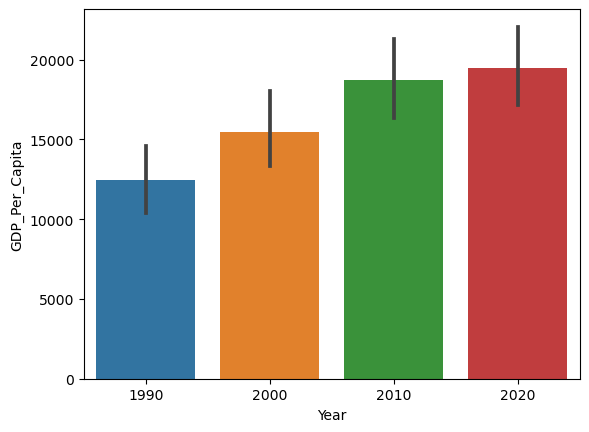

In [31]:
sns.barplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

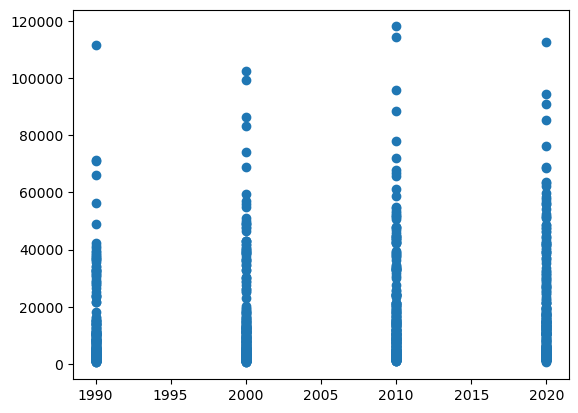

In [32]:
plt.scatter(gdp_decades['Year'], gdp_decades['GDP_Per_Capita'])
plt.show()

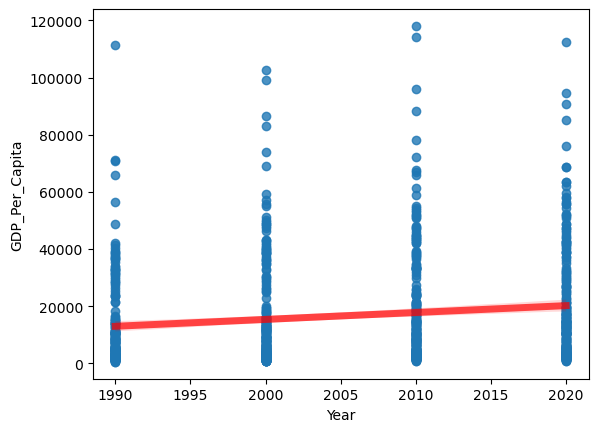

In [33]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

##### Comments: general upward trend in GDP per capita between 1990 to 2020.  The boxplot and barplot are good at showing the range of values over a specific decade and how it grows over time. It's harder to see the trend with the scatter plot until the trendline is displayed.

#### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [34]:
gdp_3c[gdp_3c.GDP_Per_Capita > 100000]

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


UAE 1990

#### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [35]:
gdp2020 = gdp_3c[gdp_3c.Year == 2020]
gdp2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [36]:
max(gdp2020['GDP_Per_Capita'])

112557.309471818

In [37]:
gdp2020max = gdp2020.sort_values(by = 'GDP_Per_Capita')

In [38]:
gdp2020max.head()

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
1136,Central African Republic,2020,937.856470
1524,Dem. Rep. Congo,2020,1082.445242
5871,Somalia,2020,1180.965971
4750,Niger,2020,1221.269930


In [39]:
gdp2020max.tail()

,Country,Year,GDP_Per_Capita
639,Bermuda,2020,76105.138057
5381,Qatar,2020,85290.450430
3071,Ireland,2020,90789.221024
5720,Singapore,2020,94505.636160
3882,Luxembourg,2020,112557.309472


In [40]:
gdp_lux = gdp_3c[gdp_3c.Country == "Luxembourg"]
gdp_lux

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


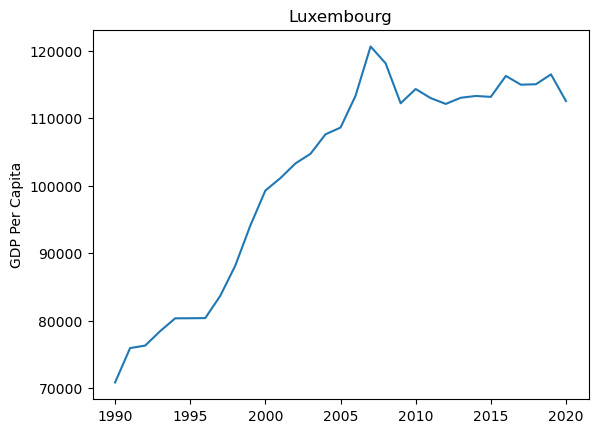

In [41]:
plt.plot(gdp_lux.Year, gdp_lux.GDP_Per_Capita)
plt.ylabel("GDP Per Capita")
plt.title("Luxembourg")
plt.show()

#### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [42]:
gdp_burundi = gdp_3c[gdp_3c.Country == "Burundi"]
gdp_burundi

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
915,Burundi,2019,751.443405
916,Burundi,2018,761.524143
917,Burundi,2017,773.572859
918,Burundi,2016,794.604340
919,Burundi,2015,825.205574
920,Burundi,2014,886.235296
921,Burundi,2013,877.272857
922,Burundi,2012,862.715651
923,Burundi,2011,852.502576


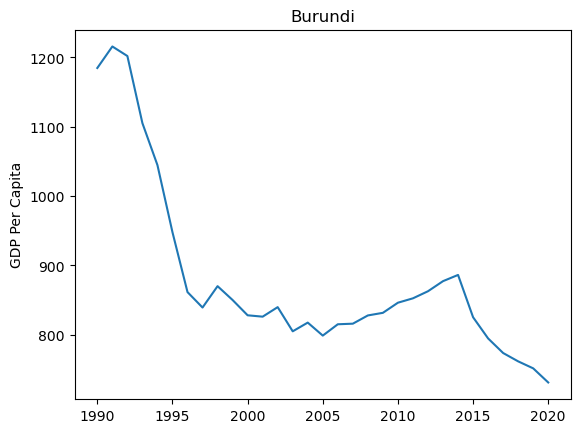

In [43]:
plt.plot(gdp_burundi.Year, gdp_burundi.GDP_Per_Capita)
plt.ylabel("GDP Per Capita")
plt.title("Burundi")
plt.show()

In [44]:
gdp1990 = gdp_3c[gdp_3c.Year == 1990]
gdp1990

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7024,Vanuatu,1990,2855.554643
7055,Vietnam,1990,2066.372215
7113,World,1990,9704.621768
7144,Zambia,1990,2190.181724


In [45]:
gdp2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


#### Skip #13 bonus question for now.

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [57]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495, skip_blank_lines=True, on_bad_lines='skip')

In [58]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [59]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [49]:
type(internet_df['Country or Area'])

pandas.core.series.Series

In [50]:
type(internet_df['Year'])

pandas.core.series.Series

In [51]:
type(internet_df['Value'])

pandas.core.series.Series

In [52]:
type(internet_df['Value Footnotes'])

pandas.core.series.Series

In [80]:
internet_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

#### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [81]:
internet_pct_df = internet_df.drop(columns = ['Value Footnotes'])
internet_pct_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [83]:
internet_pct_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_pct_df.columns

Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')

#### 16. Look at the number of observations in this dataset per year. What do you notice?

In [104]:
internet_pct_df.Year.value_counts()

1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: Year, dtype: int64

##### Records per year is not a straight line.  Max count 210 at year 1990.

#### 17. What is the first year to have a non-zero internet users percentage value?

In [113]:
internet_pct_df.Internet_Users_Pct.value_counts().sort_index(ascending=True)

0.000000     389
0.000018       1
0.000052       1
0.000092       1
0.000108       1
            ... 
96.209800      1
96.300000      1
96.546800      1
96.800000      1
98.160000      1
Name: Internet_Users_Pct, Length: 3573, dtype: int64

In [133]:
internet_pct_df[internet_pct_df.Internet_Users_Pct > 0].min()

Country               Afghanistan
Year                         1990
Internet_Users_Pct       0.000018
dtype: object

#### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [139]:
# gdp_decades = gdp_3c[(gdp_3c.Year == 1990) | (gdp_3c.Year == 2000) | (gdp_3c.Year == 2010) | (gdp_3c.Year == 2020)]

internet_2014 = internet_pct_df[(internet_pct_df.Year == 2000) | (internet_pct_df.Year == 2014)]
internet_2014

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4445,Yemen,2000,0.082500
4451,Zambia,2014,17.340000
4465,Zambia,2000,0.191072
4473,Zimbabwe,2014,19.890000


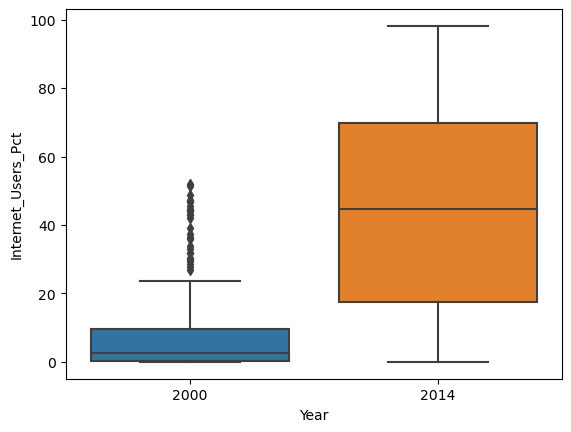

In [140]:
# sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

sns.boxplot(x=internet_2014['Year'], y=internet_2014['Internet_Users_Pct'])
plt.show()

##### The distribution of internet users percent is higher in values and larger in terms of range in 2014 compared to 2000.

#### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [143]:
internet_pct_df[(internet_pct_df.Year == 2014) & (internet_pct_df.Internet_Users_Pct < 5)].count()

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64

In [ ]:
internet 

#### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.